# Linear Regression

This is an example of a **parametric approach** where we simplify the problem by assuming that f takes a particular form. We assume that the function f is a linear combination of the predictors.

In a **non-parametric** approach we make a few simplifying assumptions as possible. Here, instead of assuming that f takes the linear regression model form, we assume thatcases that have similar predictor values should have similar response values.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [41]:
df = pd.read_csv('Data/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


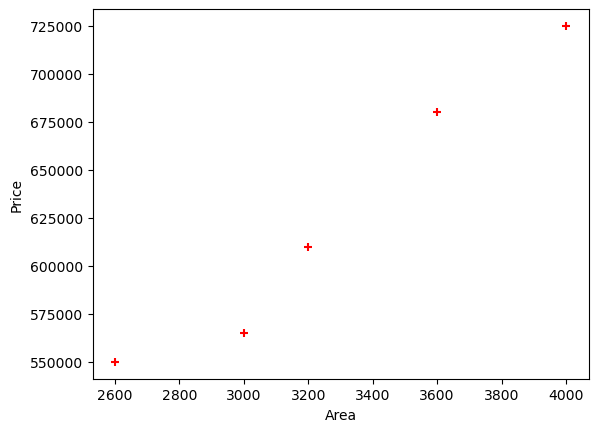

In [42]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')

From the graph we can tell that it is a linear regression problem.

In [43]:
#now we create a linear regression object

reg = linear_model.LinearRegression()
reg.fit(df[['area']], df['price'])

LinearRegression()

In [44]:
prediction = reg.predict([[3300]]) #means we are training the LR model using the available data
prediction

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

Remember the formula for a straight line equation:

$$ \ m{x}+b = y $$

The linear regression follows this equation.

In [45]:
#this gives the coefficient for x which is the slope or gradient

reg.coef_

array([135.78767123])

In [46]:
#this gives the intercept
reg.intercept_

180616.43835616432

In [47]:
##therefore, this is how it arrived at the prediction

y = reg.coef_*3300 + reg.intercept_

price_pred = 135.78767123*3300 + 180616.43835616432
price_pred

628715.7534151643

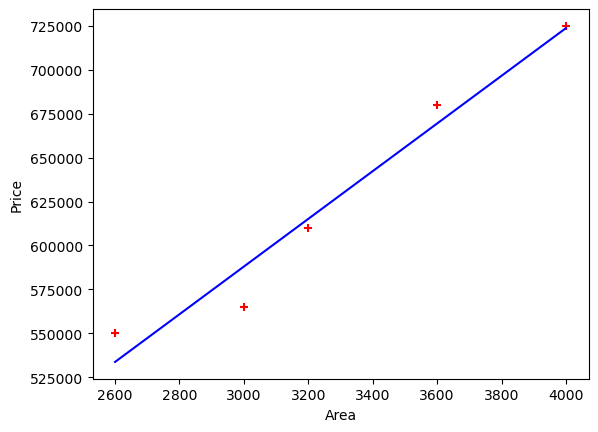

In [54]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

#### Creating a new dataframe

In [35]:
array = np.random.randint(1000, 9001, 12)
df2 = pd.DataFrame(array, columns=['area'])
df2

,area
0,4178
1,2662
2,3053
3,5461
4,1014
5,5950
6,6206
7,3406
8,6600
9,4699


In [39]:
p = reg.predict(df2)
p

array([ 747937.32876712,  542083.21917808,  595176.19863014,
        922152.9109589 ,  318305.1369863 ,  988553.08219178,
       1023314.7260274 ,  643109.24657534, 1076815.06849315,
        818682.70547945,  734901.71232877, 1318924.48630137])

In [40]:
df2['prices_pred'] = p
df2

,area,prices_pred
0,4178,7.479373e+05
1,2662,5.420832e+05
2,3053,5.951762e+05
3,5461,9.221529e+05
4,1014,3.183051e+05
5,5950,9.885531e+05
6,6206,1.023315e+06
7,3406,6.431092e+05
8,6600,1.076815e+06
9,4699,8.186827e+05


# Linear regression with multiple variables AKA multivariate regression

In [56]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [55]:
prices = pd.read_csv('Data/prices_of_homes.csv')
prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


From the data we can observe that there seems to be a linear relationship between the variables and the price.

$$ \ price = (m1*area) + (m2*bedrooms) + (m3*age) + b $$

Where:

`price = dependent variable`

`area, bedrooms, age = independent variable`
      
`m1,m2,m3 = coefficients of each independent variable` 
      
`b = intercept`

In [59]:
#take care of the NaN values

import math
median_bedrooms = math.floor(prices['bedrooms'].median())
median_bedrooms 

4

In [62]:
prices['bedrooms'] = prices['bedrooms'].fillna(median_bedrooms)
prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [65]:
reg = linear_model.LinearRegression()
reg.fit(prices[['area', 'bedrooms', 'age']], prices['price'])

LinearRegression()

In [66]:
reg.coef_, reg.intercept_

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.00186540408)

In [67]:
#predicting

reg.predict([[3000, 3, 40]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

 ## Understanding categorical variables
 
We can handle categorical variables by one hot encoding. **But this is more suitable for nominal data and not ordinal data**
 
`Nominal data`: there is no inherent order or ranking, e.g, (male, female), (green, red, blue) -- OneHotEncoding

`Ordinal data`: there is a order or ranking, e.g (satisfied, neutral, dissatisfied), (graduate, masters, PhD) -- LabelEncoding

### One hot encoding

This is done by creating a new column for each category present in the column and assign values of 1 or 0. The variables created are known as dummy variables. This can be achieved using:

- Pandas function: `pd.get_dummies()`
- Using the OneHotEncoder algorithm

In [68]:
df = pd.read_csv('Data/homes.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


### Using pandas

In [70]:
dummies = pd.get_dummies(df['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [71]:
#concat this dummies df with the original df

merged = pd.concat([df, dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


We have a potential issue here. It is the `dummy variable trap AKA multi-collinearity`.

#### What is it?
This occurs in regression analysis when using categorical variables that have been converted into dummy variables(binary variables). It happens when all categories of a categorical variable are included in the model as seperate dummy variables. This often leads to multicollinearity where one/more predictor vraibales in the model are highly correlated, making the model estimati unreliable.

#### Example
Consider a categorical variable in your dataset 'Continent' with three categories: 'Africa', 'Asia', 'Europe'. When converting this variable into dummy variables, we create three binary variables:

- Continent_Africa
- Continent_Asia
- Continent_Europe

Each of these dummy variables will be 1 if the observation belongs to that category and 0 otherwise.

#### What it does to the regression model

Including all three dummy variables while building the model causes multicollinearity because their sum would always equal 1 since every observation must belong to one and only one category:

`Continent_Africa + Continent_Asia + Continent_Europe = 1`

This is perfect multicollinearity which makes it impossible to distinguish the effect of each category, as one dummy variable can be perfectly predicted by the other two.


#### How do we deal with it?

To tackle this, the rule of thumb requires that you drop one of the created dummy variables created. In technical terms it says we should include only k-1 dummy variables for a categorical variable with k categories. By omitting one, we create a reference category against which the effects of the other categories are measured. 


#### Question
But what if I have three dummy variables for each of my 4 columns in a dataset. Does that mean that I have to drop one for each column or I should drop only one.

#### Answer
When dealing with multiple categorical variables in your data, you need to apply the principle to each categorical variable seperately. This means that if you have 5 categorical columns each with 3 different categories within them, you need to drop one for each of the categorical columns. You can drop any of your choice.

#### Code implementation

`df_dummies = pd.get_dummies(df, columns=['Color', 'Continent', 'Country', 'Gender'], drop_first = True)`

In [72]:
#based on the above we need to drop the town column and one of the dummy variables

final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


Note that when using the sklearn linear regression model, it would work fine even if you don't drop one dummy column because it is aware of this trap and drops it automatically. However, it is good practice to drop it.

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
X = final.drop('price', axis = 'columns')
y = final.price

X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [77]:
model.fit(X, y)

LinearRegression()

In [78]:
#predicting price for a home in robinsville

model.predict([[2800, 0, 1]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [79]:
#predicting price for a home in west windsor

model.predict([[3400, 0,0]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [80]:
model.score(X,y)

#to get an idea on how accurate the model is

0.9573929037221873

### Using OneHotEncoder

In [101]:
prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [103]:
#creating a new df
df2 = df

df2.town = le.fit_transform(df2.town)
df2

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [104]:
X = df2[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [105]:
y = df2.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [106]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
                    transformers=[
                        ('onehot', OneHotEncoder(), [0])
                    ], remainder='passthrough')

Remember that X is an array and if you should pass the array X into fit_transform, it would assume that both columns are categorical features. 

We use the ColumnTransformer for this purpose.

In [107]:
X = column_transformer.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [108]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [109]:
#training the model
model.fit(X,y)

LinearRegression()

In [111]:
#prediction for a 2800 area home in robinsville

model.predict([[1,0,2800]])

array([590775.63964739])

In [112]:
#prediction for a 3400 area home in west windsor
model.predict([[0,1,3400]])

array([681241.6684584])